In [8]:
import numpy as np
from mfactorization import mf
from util.data_reader import read_interaction_matrix
from util import easy_eval, heatmaps

rand = np.random.default_rng(1234)

R = read_interaction_matrix()

# single_eps = np.linspace(500, 1200, 3, True).astype(int)
single_eps = [50, 150, 500, 1000]
batch_ep = [0]
# batch_ep = np.linspace(0, 200, 4).astype(int)
single_lr = [0.008, 0.02]
# single_lr = 0.1 ** (np.linspace(2.2,2.7,2, True))
# single_lr = np.linspace((0.1, 0.6, 3, True))
batch_sam = [0]
# batch_sam = 0.1 ** (np.linspace(1,4,4, True))
# single_sample_size = 0.1 ** (np.linspace(0.3, 0.7, 4, True))
single_sample_size = [0.01, 0.05, 0.1]

scores = np.zeros([len(x) for x in [single_eps, batch_ep, single_lr, batch_sam, single_sample_size]])
best = 0

for i, s_ep in enumerate(single_eps):
    for j, b_ep in enumerate(batch_ep):
        for k, sin_lr in enumerate(single_lr):
            for l, bat_s in enumerate(batch_sam):
                for m, sin_s in enumerate(single_sample_size):
                    if s_ep == 0 and b_ep == 0:
                        continue

                    r = rand.random()
                    if r > 0.5:
                        continue

                    # try:
                    print(f'''
                        ep: batch {b_ep}, single {s_ep}
                        sample size: batch {bat_s:.2e} single {sin_s:.2e}
                        lr: single {sin_lr:.2e}
                        ''')
                    
                    q,p = mf(
                        R, 
                        n_epochs=s_ep + b_ep, 
                        n_latent=16, 
                        batch_sample_s=bat_s, 
                        sample_s=sin_s,
                        single_epochs=s_ep, 
                        single_lr=sin_lr,
                        print_step=2
                        )
                    
                    S =q@p.T
                    score = float(easy_eval(S))
                    scores[i,j,k,l,m] = score
                        
                    print(f'score: {score}')

                    if score >= best:
                        best = score
                        print("BEST SO FAR")

                    # heatmaps([S[0:10, 0:10]])
                    # print()
                        
                    # except:
                    #     pass


                        ep: batch 0, single 50
                        sample size: batch 0.00e+00 single 5.00e-02
                        lr: single 8.00e-03
                        


28it [00:01, 22.58it/s]

err: 2.25e+04, lr: 0.008 

50it [00:02, 22.25it/s]


best error: 2.21e+04
score: 0.49


TypeError: '>=' not supported between instances of 'str' and 'int'

In [7]:
scores.max()

0.63

In [2]:
sc2d = scores.reshape((-1, 3))
heatmaps([sc2d])
sc2d

ValueError: cannot reshape array of size 4 into shape (3)

In [ ]:
i = np.unravel_index(sc2d.argmax(), scores.shape)
scores[i]

0.99

In [ ]:
sep, slr = single_eps[i[0]], single_lr[i[2]]
i, sep, slr

((0, 0, 1, 0, 1), 500, 0.001995262314968879)

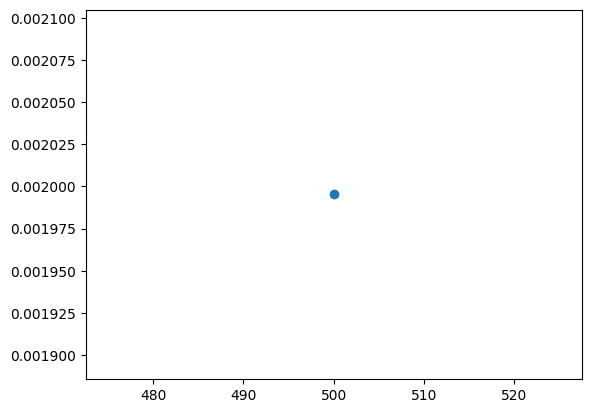

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(single_eps, single_lr)
plt.scatter(sep, slr)

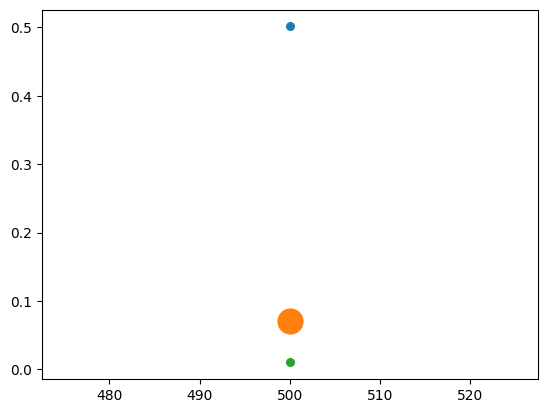

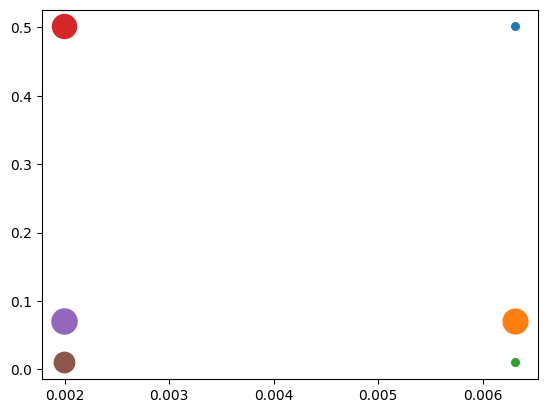

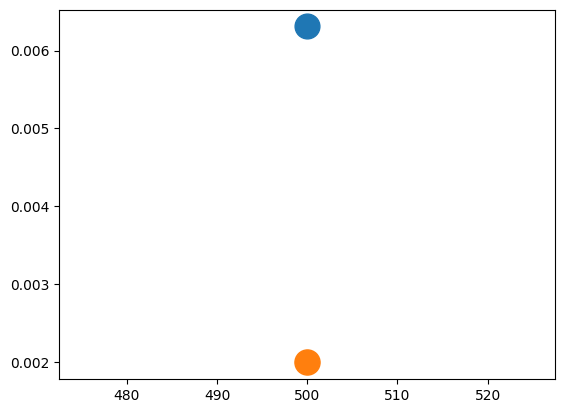

In [ ]:

def twoDplot(ssd, l1, l2):
    for i in range(ssd.shape[0]):
        for j in range(ssd.shape[1]):
            plt.scatter(l1[i], l2[j], (ssd[i,j]+ 0.1)*300)  
    plt.show()

ssd = scores[:,0,:,0,:]
twoDplot(ssd[:, 0, :], single_eps, single_sample_size)
twoDplot(ssd[0, :, :], single_lr, single_sample_size)
twoDplot(ssd[:, :, 1], single_eps, single_lr)

In [ ]:
ssd[0, :, 0], single_lr[1:3]

(array([0. , 0.9]), array([0.00199526]))

In [ ]:
ssd[0, 1, :], single_sample_size[0]

(array([0.9 , 0.99, 0.62]), 0.5011872336272724)

In [ ]:
ssd[0, 0, :], single_sample_size[1]

(array([0.  , 0.96, 0.  ]), 0.07079457843841382)

In [ ]:
ssd.shape

(1, 2, 3)

In [ ]:
plt.scatter(single_eps)

TypeError: scatter() missing 1 required positional argument: 'y'

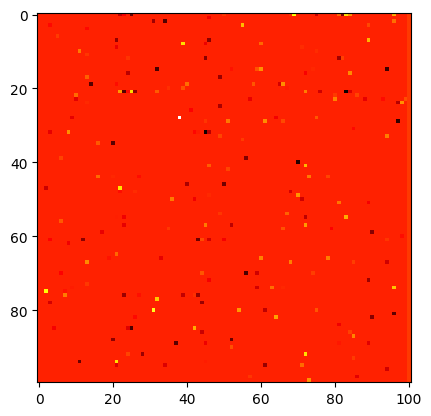

In [ ]:
heatmaps([(S * R * 10)[0:100, 0:100]]) 

In [ ]:
scores[1, 0, 2, 0, 2]

0.0

In [ ]:
scores.reshape((-1, 4))

array([[0.  , 0.  , 0.54, 0.79],
       [0.52, 0.53, 0.63, 0.52]])